In [ ]:
1:
    
    

In [4]:
# Import necessary libraries
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('dataset.csv')

In [5]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [6]:
missing_values = data.isnull().sum()
print(missing_values)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [7]:
print(data.dtypes)



age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


In [8]:
from sklearn.preprocessing import StandardScaler

# Define the features to scale
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the numerical features
scaler.fit(data[numerical_features])

# Transform the numerical features
data[numerical_features] = scaler.transform(data[numerical_features])


In [ ]:
2:

In [9]:
from sklearn.model_selection import train_test_split

# Split the dataset into features and target variable
X = data.drop('target', axis=1)
y = data['target']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
3:


In [10]:
from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier with 100 trees and a maximum depth of 10
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Fit the classifier to the training data
rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, random_state=42)

In [11]:
# Make predictions on the test data
y_pred = rf.predict(X_test)


In [12]:
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1], dtype=int64)

In [ ]:
4:

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate the accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print('Accuracy: {:.2f}'.format(accuracy))
print('Precision: {:.2f}'.format(precision))
print('Recall: {:.2f}'.format(recall))
print('F1 Score: {:.2f}'.format(f1))


Accuracy: 0.81
Precision: 0.84
Recall: 0.82
F1 Score: 0.83


In [ ]:
5:


Feature ranking:
1. feature ca (0.13)
2. feature cp (0.13)
3. feature thalach (0.11)
4. feature oldpeak (0.11)
5. feature thal (0.10)
6. feature age (0.09)
7. feature exang (0.07)
8. feature chol (0.07)
9. feature trestbps (0.07)
10. feature slope (0.05)
11. feature sex (0.04)
12. feature restecg (0.02)
13. feature fbs (0.01)


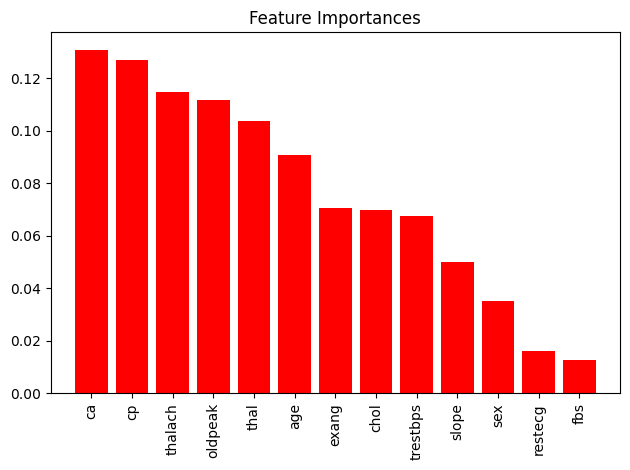

In [14]:
import matplotlib.pyplot as plt
import numpy as np
# Get feature importances and sort them in descending order
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Get the names of the features
features = X.columns

# Print the feature ranking
print('Feature ranking:')
for f in range(len(features)):
    print('{}. feature {} ({:.2f})'.format(f + 1, features[indices[f]], importances[indices[f]]))

# Plot the feature importances
plt.figure()
plt.title('Feature Importances')
plt.bar(range(len(features)), importances[indices], color='r', align='center')
plt.xticks(range(len(features)), features[indices], rotation=90)
plt.xlim([-1, len(features)])
plt.tight_layout()
plt.show()


In [ ]:
6:

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4] }

In [16]:
# Create a random forest classifier
rf = RandomForestClassifier()

# Create a grid search object
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print('Best hyperparameters:', grid_search.best_params_)

# Use the best hyperparameters to train the random forest classifier
rf_best = RandomForestClassifier(**grid_search.best_params_)
rf_best.fit(X_train, y_train)

# Evaluate the performance of the model on the test set
y_pred = rf_best.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred))

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.9s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.9s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END max_depth=5, min_samples_leaf

In [ ]:
7:

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [ 100, 200 , 500,],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object with the random forest classifier and the parameter grid
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best set of hyperparameters and corresponding performance metrics
print("Best hyperparameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)
print("Test set score:", grid_search.score(X_test, y_test))
print("Precision:", precision_score(y_test, grid_search.predict(X_test)))
print("Recall:", recall_score(y_test, grid_search.predict(X_test)))
print("F1 score:", f1_score(y_test, grid_search.predict(X_test)))


In [ ]:
8:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Load the heart disease dataset
# (assuming the dataset has already been preprocessed and split into train/test sets)
X_train, y_train = ...
X_test, y_test = ...

# Train a random forest classifier with the best hyperparameters found in Q6
clf = RandomForestClassifier(n_estimators=..., max_depth=..., min_samples_split=..., min_samples_leaf=...)
clf.fit(X_train, y_train)

# Get the feature importances
importances = clf.feature_importances_

# Select the two most important features
top_features = np.argsort(importances)[::-1][:2]
x1, x2 = X_train[:, top_features[0]], X_train[:, top_features[1]]

# Create a grid of points covering the range of the two features
x1_min, x1_max = x1.min() - 1, x1.max() + 1
x2_min, x2_max = x2.min() - 1, x2.max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01),
                       np.arange(x2_min, x2_max, 0.01))
Z = clf.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)

# Plot the decision boundaries on a scatter plot of the two features
plt.contourf(xx1, xx2, Z, alpha=0.4)
plt.scatter(x1, x2, c=y_train, alpha=0.8)
plt.xlabel('Age')
plt.ylabel('Max heart rate')
plt.title('Decision boundaries of random forest classifier')
plt.show()
